# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins
from shapely import wkt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Source-Paths
- To run the code, assign the path, where you store the data, to your name as a variable.
- Then replace the user with your own name.

In [2]:
michael = "C:/Users/micha/Documents/1_Wirtschaftsinformatik/4. Semester/Data Science & Machine Learning/Gruppenprojekt/"
martin = "C:/Users/mbirk/OneDrive/Uni/Semester_4/DSML/YMMMMY/YMMMMY_repository/data/"
yannick = "C:/Users/Yannick Herrmann/Documents/Uni/DSML/Data/"

user = martin

ride_source= user + "2019_05.csv"
weather_source= user + "weather.csv"
census_tract_source= user + "census_tract_characteristics.csv"

Reading the Data


In [3]:
ride = pd.read_csv(ride_source)
weather = pd.read_csv(weather_source)
census_tract = pd.read_csv(census_tract_source)

# Raw Data

In [4]:
ride.head()

Trip ID Trip Miles Trip Start Timestamp  \
0  001ab3a53a4f74430d2a9aae216fed703244cfc9        1.5  2019-05-01 00:00:00   
1  01080eb6fc1bd9ec70e3fd8a2a56345754b92332        5.7  2019-05-01 00:00:00   
2  015aeacaa25560b04a0dfc6a48f95a820f9a22f6        0.7  2019-05-01 00:00:00   
3  01aded4891f4d76040f68a15730afcb5003b70ea        2.7  2019-05-01 00:00:00   
4  023ea4b576bf41415848e32b5fc4fae7d49e4cca        0.7  2019-05-01 00:00:00   

    Trip End Timestamp  Pickup Census Tract  \
0  2019-05-01 00:00:00         1.703183e+10   
1  2019-05-01 00:15:00         1.703108e+10   
2  2019-05-01 00:15:00         1.703133e+10   
3  2019-05-01 00:15:00         1.703128e+10   
4  2019-05-01 00:00:00         1.703128e+10   

               Pickup Centroid Location  Dropoff Census Tract  \
0  POINT (-87.6542980837 41.9462945357)          1.703106e+10   
1  POINT (-87.6288741572 41.8920726347)          1.703183e+10   
2   POINT (-87.6173580061 41.859349715)          1.703184e+10   
3   POINT (-87.642648998 41.8792550844)          1.703108e+10   
4  POINT (-87.6428084655 41.8853000224)          1.703184e+10   

              Dropoff Centroid Location  Shared Trip Authorized  Trips Pooled  \
0   POINT (-87.671518011 41.9579038971)                   False             1   
1  POINT (-87.6542980837 41.9462945357)                    True             2   
2  POINT (-87.6314065252 41.8710158803)                   False             1   
3  POINT (-87.6318639497 41.8920421365)                   False             1   
4  POINT (-87.6327464887 41.8809944707)                   False             1   

   Trip Total  Fare  Additional Charges  Tip  
0        5.05   2.5                2.55    0  
1        8.22   7.5                0.72    0  
2        5.05   2.5                2.55    0  
3       10.05   7.5                2.55    0  
4        7.55   5.0                2.55    0

In [5]:
weather.head()

date  wind  precipitation  avg_temp
0  2018-10-01   3.2           39.6      16.0
1  2018-10-02   2.3            0.3      16.7
2  2018-10-03   6.2            0.0      20.9
3  2018-10-04   7.2            1.0      18.8
4  2018-10-05   3.2           31.5      14.1

In [6]:
census_tract.head()

ID  population  households  share_female  median_age  \
0  17031010100        4522        2316         0.491        35.3   
1  17031010201        7039        2688         0.474        36.3   
2  17031010202        2852        1102         0.513        35.7   
3  17031010300        6650        3037         0.505        41.6   
4  17031010400        5153        1938         0.533        25.2   

   share_over_65  avg_household_size  share_bachelor_degree_or_higher  \
0          0.056                1.89                            0.469   
1          0.066                2.55                            0.308   
2          0.134                2.30                            0.333   
3          0.188                1.87                            0.394   
4          0.066                1.86                            0.655   

   unemployment_rate  share_income_below_poverty_level  
0              0.070                             0.358  
1              0.073                             0.368  
2              0.065                             0.185  
3              0.049                             0.161  
4              0.077                             0.191

Check for missing values

In [7]:
print(ride.isnull().sum())

Trip ID                      0
Trip Miles                   0
Trip Start Timestamp         0
Trip End Timestamp           0
Pickup Census Tract          0
Pickup Centroid Location     0
Dropoff Census Tract         0
Dropoff Centroid Location    0
Shared Trip Authorized       0
Trips Pooled                 0
Trip Total                   0
Fare                         0
Additional Charges           0
Tip                          0
dtype: int64


In [8]:
print(weather.isnull().sum())

date             0
wind             0
precipitation    0
avg_temp         0
dtype: int64


In [9]:
print(census_tract.isnull().sum())

ID                                  0
population                          0
households                          0
share_female                        0
median_age                          0
share_over_65                       0
avg_household_size                  0
share_bachelor_degree_or_higher     0
unemployment_rate                   0
share_income_below_poverty_level    0
dtype: int64


Deep Copy

In [10]:
rawRides = ride.copy(deep = True)
rawWeather = weather.copy(deep = True)
rawCensusTract = census_tract.copy(deep = True)

Check Data-Types

In [11]:
rawRides.dtypes

Trip ID                       object
Trip Miles                    object
Trip Start Timestamp          object
Trip End Timestamp            object
Pickup Census Tract          float64
Pickup Centroid Location      object
Dropoff Census Tract         float64
Dropoff Centroid Location     object
Shared Trip Authorized          bool
Trips Pooled                   int64
Trip Total                   float64
Fare                         float64
Additional Charges           float64
Tip                            int64
dtype: object

In [12]:
rawWeather.dtypes

date              object
wind             float64
precipitation    float64
avg_temp         float64
dtype: object

In [13]:
rawCensusTract.dtypes

ID                                    int64
population                            int64
households                            int64
share_female                        float64
median_age                          float64
share_over_65                       float64
avg_household_size                  float64
share_bachelor_degree_or_higher     float64
unemployment_rate                   float64
share_income_below_poverty_level    float64
dtype: object

Convert dtype time in rawRides and rawWeather to datetime

In [14]:
updatedRides = rawRides.copy(deep = True)
updatedWeather = rawWeather.copy(deep = True)

In [15]:
updatedRides["Trip Start Timestamp"] = pd.to_datetime(updatedRides["Trip Start Timestamp"])
updatedRides["Trip End Timestamp"] = pd.to_datetime(updatedRides["Trip End Timestamp"])
updatedWeather["date"] = pd.to_datetime(updatedWeather["date"])

Confirm conversion

In [16]:
updatedRides.dtypes

Trip ID                              object
Trip Miles                           object
Trip Start Timestamp         datetime64[ns]
Trip End Timestamp           datetime64[ns]
Pickup Census Tract                 float64
Pickup Centroid Location             object
Dropoff Census Tract                float64
Dropoff Centroid Location            object
Shared Trip Authorized                 bool
Trips Pooled                          int64
Trip Total                          float64
Fare                                float64
Additional Charges                  float64
Tip                                   int64
dtype: object

In [17]:
updatedWeather.dtypes

date             datetime64[ns]
wind                    float64
precipitation           float64
avg_temp                float64
dtype: object

Insert 'Date' column


In [18]:
only_date = updatedRides["Trip Start Timestamp"]
updatedRides.insert(2, "Date", only_date)
updatedRides["Date"] =  updatedRides["Date"].dt.date
updatedRides["Date"] =  pd.to_datetime(updatedRides["Date"])
updatedRides.dtypes

Trip ID                              object
Trip Miles                           object
Date                         datetime64[ns]
Trip Start Timestamp         datetime64[ns]
Trip End Timestamp           datetime64[ns]
Pickup Census Tract                 float64
Pickup Centroid Location             object
Dropoff Census Tract                float64
Dropoff Centroid Location            object
Shared Trip Authorized                 bool
Trips Pooled                          int64
Trip Total                          float64
Fare                                float64
Additional Charges                  float64
Tip                                   int64
dtype: object

Add suffix _pickup & _dropoff

In [19]:
updatetCensusTract_pickup = rawCensusTract.rename(columns={'ID': 'Census Tract ID_pickup',
                                                    'population': 'population_pickup',
                                                    'households': 'households_pickup',
                                                    'share_female': 'share_female_pickup',
                                                    'median_age': 'median_age_pickup',
                                                    'share_over_65': 'share_over_65_pickup',
                                                    'avg_household_size': 'avg_household_size_pickup',
                                                    'share_bachelor_degree_or_higher': 'share_bachelor_degree_or_higher_pickup',
                                                    'unemployment_rate': 'unemployment_rate_pickup',
                                                    'share_income_below_poverty_level': 'share_income_below_poverty_level_pickup'}, inplace=False)
updatetCensusTract_dropoff = rawCensusTract.rename(columns={'ID': 'Census Tract ID_dropoff',
                                                    'population': 'population_dropoff',
                                                    'households': 'households_dropoff',
                                                    'share_female': 'share_female_dropoff',
                                                    'median_age': 'median_age_dropoff',
                                                    'share_over_65': 'share_over_65_dropoff',
                                                    'avg_household_size': 'avg_household_dropoff',
                                                    'share_bachelor_degree_or_higher': 'share_bachelor_degree_or_higher_dropoff',
                                                    'unemployment_rate': 'unemployment_rate_dropoff',
                                                    'share_income_below_poverty_level': 'share_income_below_poverty_level_dropoff'}, inplace=False)

# Join Data


In [20]:
combined_data = updatedRides.merge(updatedWeather,how="left", left_on="Date", right_on="date")
combined_data = combined_data.merge(
    updatetCensusTract_pickup,
    left_on='Pickup Census Tract',
    right_on='Census Tract ID_pickup',
    how='left')
combined_data = combined_data.merge(
    updatetCensusTract_dropoff,
    left_on='Dropoff Census Tract',
    right_on='Census Tract ID_dropoff',
    how='left')

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473076 entries, 0 to 6473075
Data columns (total 39 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   Trip ID                                   object        
 1   Trip Miles                                object        
 2   Date                                      datetime64[ns]
 3   Trip Start Timestamp                      datetime64[ns]
 4   Trip End Timestamp                        datetime64[ns]
 5   Pickup Census Tract                       float64       
 6   Pickup Centroid Location                  object        
 7   Dropoff Census Tract                      float64       
 8   Dropoff Centroid Location                 object        
 9   Shared Trip Authorized                    bool          
 10  Trips Pooled                              int64         
 11  Trip Total                                float64       
 12  Fare          

# Errors in Trip Miles

Convert Trip Miles to float


In [21]:
combined_data['Trip Miles'] = combined_data['Trip Miles'].str.replace(' mi', '', regex=False)
combined_data['Trip Miles'] = pd.to_numeric(combined_data['Trip Miles'])

Check conversion

In [22]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473076 entries, 0 to 6473075
Data columns (total 39 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   Trip ID                                   object        
 1   Trip Miles                                float64       
 2   Date                                      datetime64[ns]
 3   Trip Start Timestamp                      datetime64[ns]
 4   Trip End Timestamp                        datetime64[ns]
 5   Pickup Census Tract                       float64       
 6   Pickup Centroid Location                  object        
 7   Dropoff Census Tract                      float64       
 8   Dropoff Centroid Location                 object        
 9   Shared Trip Authorized                    bool          
 10  Trips Pooled                              int64         
 11  Trip Total                                float64       
 12  Fare          

Negative Values

- Some values of 'Trip Miles' are negative
- Since driving negative miles is impossible we check if only the sign is wrong.

In [23]:
# average fare / mile (positive Trip Miles)
positiveTripMiles = combined_data[(combined_data['Trip Miles'] > 0) & (combined_data['Fare'])]
positiveTripMiles['averageTripCost'] = positiveTripMiles['Fare']/positiveTripMiles['Trip Miles']
avgCostMilePos = positiveTripMiles['averageTripCost'].mean()

# average fare / mile (negative Trip Miles)
negativeTripMiles = combined_data[(combined_data['Trip Miles'] <0) & (combined_data['Fare'])]
negativeTripMiles['averageTripCost'] = negativeTripMiles['Fare']/negativeTripMiles['Trip Miles']
avgCostMileNeg = negativeTripMiles['averageTripCost'].mean()

print(avgCostMilePos)
print(avgCostMileNeg)

3.3907753381253616
-3.393281715247924


C:\Users\mbirk\AppData\Local\Temp\ipykernel_72340\437582233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positiveTripMiles['averageTripCost'] = positiveTripMiles['Fare']/positiveTripMiles['Trip Miles']
C:\Users\mbirk\AppData\Local\Temp\ipykernel_72340\437582233.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativeTripMiles['averageTripCost'] = negativeTripMiles['Fare']/negativeTripMiles['Trip Miles']


- Since the cost per mile is the same, we will use the absolute values.


In [57]:
combined_data['Trip Miles'] = combined_data['Trip Miles'].abs()


- Prove that the overall cost per mile remains the same:


In [ ]:
costTripMiles = combined_data[(combined_data['Trip Miles']>0) & (combined_data['Fare'])]
costTripMiles['averageTripCost'] = costTripMiles['Fare']/costTripMiles['Trip Miles']
avgCostMile = costTripMiles['averageTripCost'].mean()
print(avgCostMile)

# Add column Tip Binary


In [58]:
tip_binary = (combined_data['Tip'] > 0).astype(int)
combined_data.insert(1, "Tip Binary", tip_binary)

ValueError: cannot insert Tip Binary, already exists

# Add weekdays


In [60]:
combined_data['Weekday'] = combined_data['Date'].dt.weekday
# map weekdays to actual names
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
combined_data['Weekday_Name'] = combined_data['Weekday'].map(weekday_names)
# one-hot encoding of weekdays
dummies = pd.get_dummies(combined_data['Weekday_Name'], drop_first=True)
combined_data = pd.concat([combined_data, dummies], axis = 1)
combined_data.drop(['Weekday_Name'], axis=1, inplace=True)
#combined_data.drop(['Weekday'], axis=1, inplace=True)
combined_data.head()

Trip ID  Tip Binary  Trip Miles  \
0  001ab3a53a4f74430d2a9aae216fed703244cfc9           0         1.5   
1  01080eb6fc1bd9ec70e3fd8a2a56345754b92332           0         5.7   
2  015aeacaa25560b04a0dfc6a48f95a820f9a22f6           0         0.7   
3  01aded4891f4d76040f68a15730afcb5003b70ea           0         2.7   
4  023ea4b576bf41415848e32b5fc4fae7d49e4cca           0         0.7   

        Date Trip Start Timestamp  Trip End Timestamp  Pickup Census Tract  \
0 2019-05-01           2019-05-01 2019-05-01 00:00:00         1.703183e+10   
1 2019-05-01           2019-05-01 2019-05-01 00:15:00         1.703108e+10   
2 2019-05-01           2019-05-01 2019-05-01 00:15:00         1.703133e+10   
3 2019-05-01           2019-05-01 2019-05-01 00:15:00         1.703128e+10   
4 2019-05-01           2019-05-01 2019-05-01 00:00:00         1.703128e+10   

               Pickup Centroid Location  Dropoff Census Tract  \
0  POINT (-87.6542980837 41.9462945357)          1.703106e+10   
1  POINT (-87.6288741572 41.8920726347)          1.703183e+10   
2   POINT (-87.6173580061 41.859349715)          1.703184e+10   
3   POINT (-87.642648998 41.8792550844)          1.703108e+10   
4  POINT (-87.6428084655 41.8853000224)          1.703184e+10   

              Dropoff Centroid Location  ... Sunday  Thursday  Tuesday  \
0   POINT (-87.671518011 41.9579038971)  ...  False     False    False   
1  POINT (-87.6542980837 41.9462945357)  ...  False     False    False   
2  POINT (-87.6314065252 41.8710158803)  ...  False     False    False   
3  POINT (-87.6318639497 41.8920421365)  ...  False     False    False   
4  POINT (-87.6327464887 41.8809944707)  ...  False     False    False   

   Wednesday  Monday  Saturday Sunday  Thursday  Tuesday  Wednesday  
0       True   False     False  False     False    False       True  
1       True   False     False  False     False    False       True  
2       True   False     False  False     False    False       True  
3       True   False     False  False     False    False       True  
4       True   False     False  False     False    False       True  

[5 rows x 59 columns]

# Drop unusable data for visualization
- Visualization without Geo-Data

In [ ]:
combined_data_copy = combined_data.copy()
usableData = combined_data_copy.drop(columns=['Trip ID','Pickup Centroid Location','Dropoff Centroid Location'])

- Visualization without Geo-Data


In [ ]:
combined_data_copy2 = combined_data.copy()
combined_data_copy2 = combined_data_copy2[["Trip ID","Pickup Centroid Location", "Dropoff Centroid Location"]]
combined_data_copy2

# Correlation


In [ ]:
usableData.corr()

# Sorted correlation with 'Tip'


In [ ]:
correlation_matrix = usableData.corr()

# Extrahieren der Korrelationen zur Spalte 'Tip Binary'
tip_binary_correlation = correlation_matrix['Tip Binary']

# Sortieren der Korrelationen in absteigender Reihenfolge
sorted_correlations = tip_binary_correlation.sort_values(ascending=False)

# Ergebnis anzeigen
print(sorted_correlations)

# Visualization

Sample data to speed up compiling
- Visualizing all data points can take a long time and uses a lot of memory space
- Chosing a smaller sample improves performance


In [ ]:
sampled_data = usableData.sample(frac=0.001, random_state=40)
sampled_data.fillna(sampled_data.mean(), inplace=True)

# Boxplot of Trip Total by No Tip / Tip


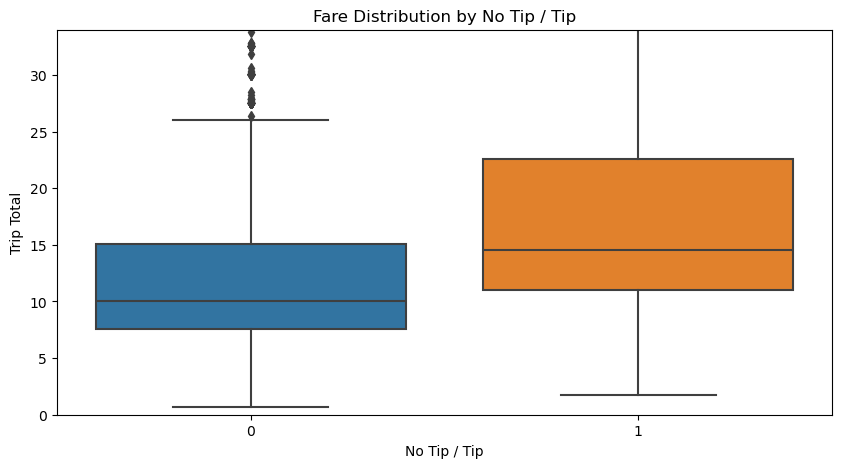

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=sampled_data, x='Tip Binary', y='Trip Total')
plt.title('Trip Total Distribution by No Tip / Tip')
plt.ylim(0,34)
plt.xlabel('No Tip / Tip')
plt.ylabel('Trip Total')
plt.show()

# Histogram of Additional Charges with and without tip

c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


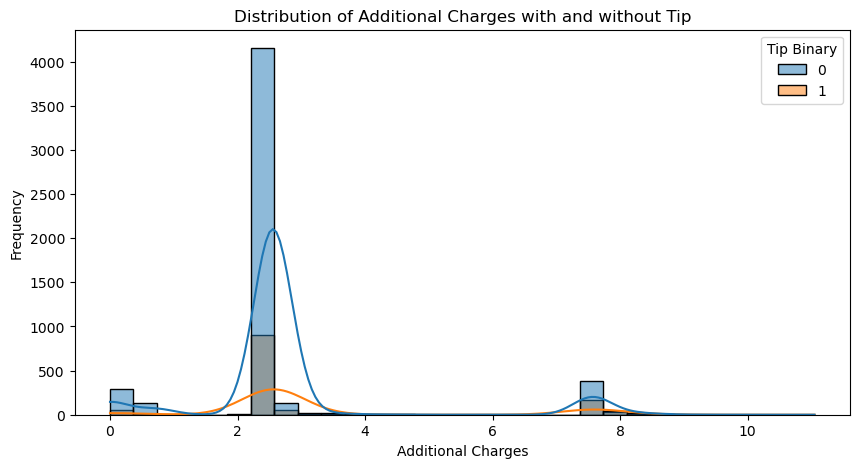

In [67]:
plt.figure(figsize=(10, 5))
sns.histplot(data=sampled_data, x='Additional Charges', hue='Tip Binary', kde=True, bins=30)
plt.title('Distribution of Additional Charges with and without Tip')
plt.xlabel('Additional Charges')
plt.ylabel('Frequency')
plt.show()

# Bar plot of shared trip authorized by Tip / No Tip

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=sampled_data, x='Shared Trip Authorized', hue='Tip Binary')
plt.title('Shared Trip Authorized by Tipping Status')
plt.xlabel('Shared Trip Authorized')
plt.ylabel('Count')
plt.show()

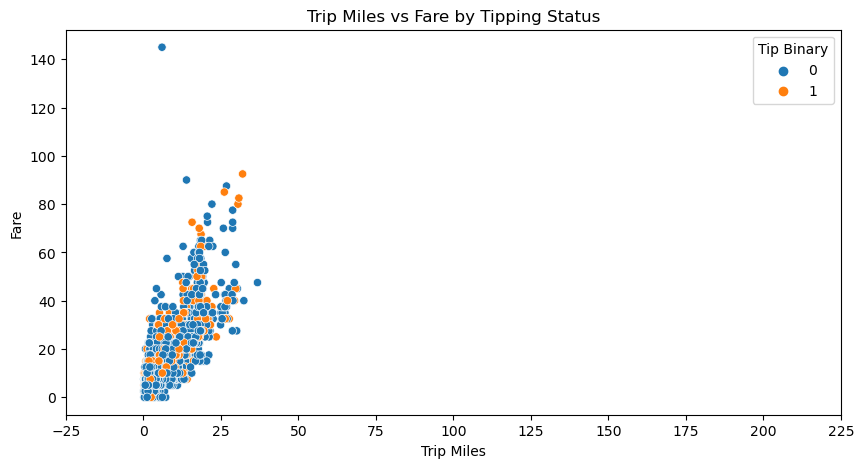

In [37]:
# Scatter plot of trip miles vs fare colored by Tip / No Tip


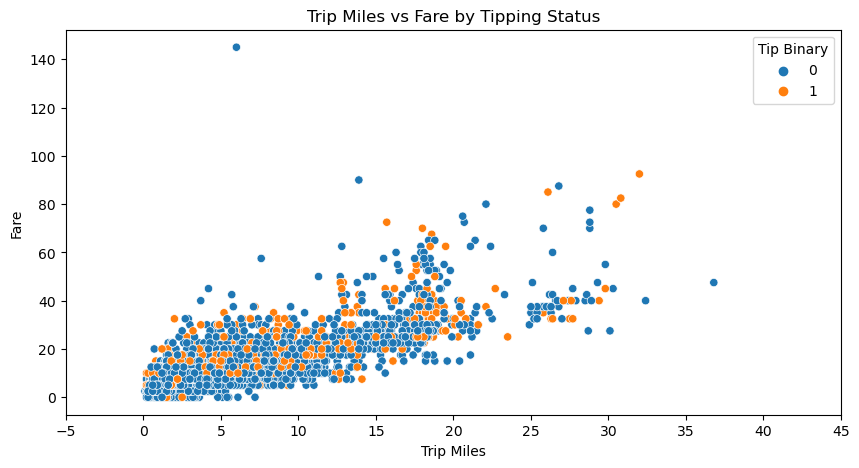

In [73]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=sampled_data, x='Trip Miles', y='Fare', hue='Tip Binary')
plt.title('Trip Miles vs Fare by Tipping Status')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')
# Set x range and interval
min_trip_miles = sampled_data['Trip Miles'].min()
max_trip_miles = sampled_data['Trip Miles'].max()
plt.xlim(min_trip_miles, max_trip_miles)
plt.xticks(ticks=np.arange(-5, 50, step=5))
plt.show()

c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mbirk\anaconda3\envs\DSML_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


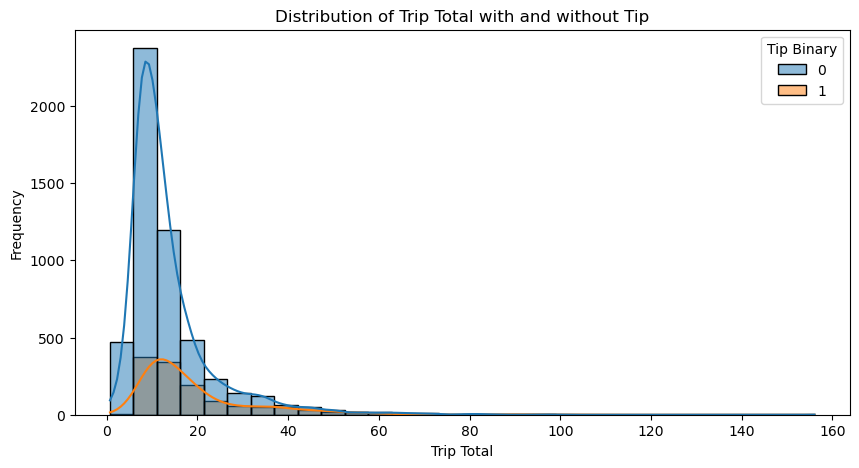

In [38]:
# Histogram of trip total with and without tip
plt.figure(figsize=(10, 5))
sns.histplot(data=sampled_data, x='Trip Total', hue='Tip Binary', kde=True, bins=30)
plt.title('Distribution of Trip Total with and without Tip')
plt.xlabel('Trip Total')
plt.ylabel('Frequency')
plt.show()

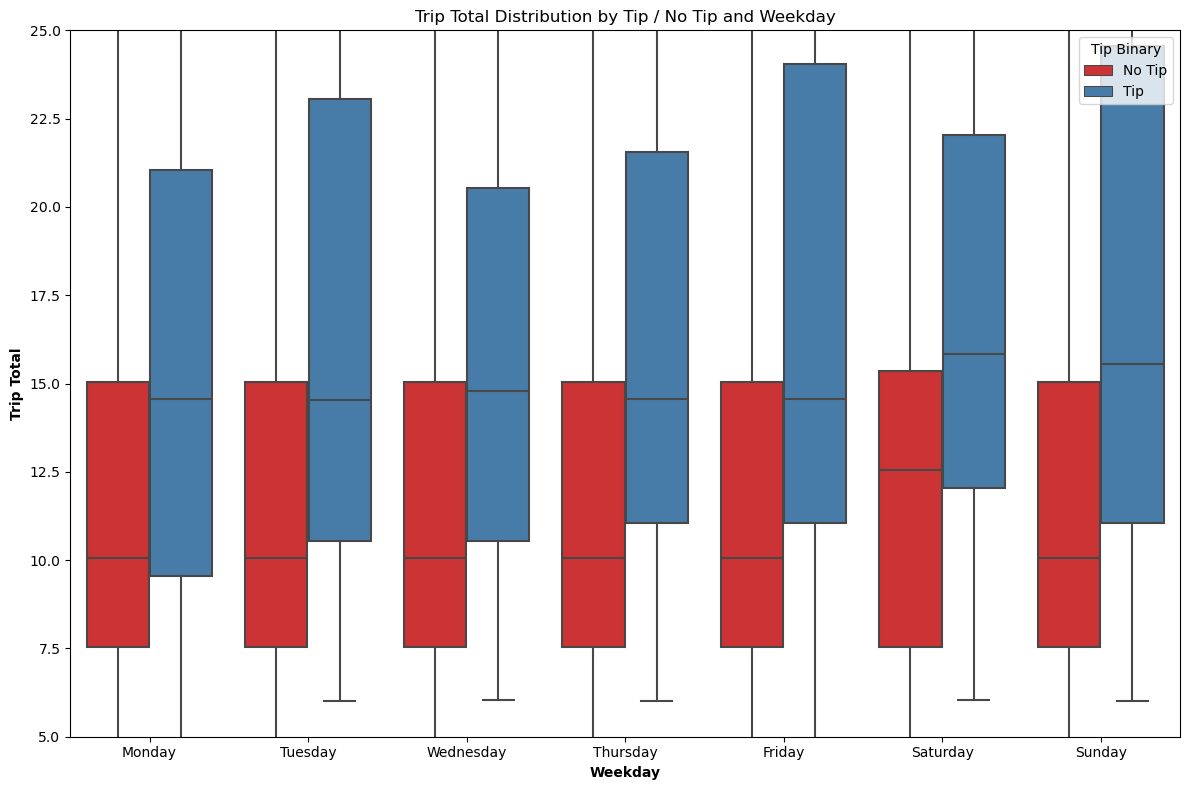

In [39]:
# Boxplot of Trip Total by Tipping Status by Weekday
plt.figure(figsize=(12, 8))
sns.boxplot(data=sampled_data, x='Weekday', y='Trip Total', hue='Tip Binary', palette='Set1')
plt.title('Trip Total Distribution by Tip / No Tip and Weekday')
plt.xlabel('Weekday',fontweight='bold')
plt.ylabel('Trip Total',fontweight='bold')
# legend
legend_labels = ['No Tip', 'Tip']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Tip Binary', loc='upper right')
# weekdays instead of numbers
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=np.arange(len(weekday_labels)), labels=weekday_labels)
plt.ylim(5,25) # remove this line to zoom out
plt.tight_layout()
plt.show()

In [40]:
# Chicago-Map Pickup
df = pd.DataFrame(combined_data_copy2["Pickup Centroid Location"])

# 1% of original dataframe
sample_df = df.sample(frac=0.01, random_state=41)

# convert POINT in Shapely
sample_df["Pickup Centroid Location"] = sample_df["Pickup Centroid Location"].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)

# extract latitude and longitude
sample_df["Latitude"] = sample_df["Pickup Centroid Location"].apply(lambda point: point.y if point else None)
sample_df["Longitude"] = sample_df["Pickup Centroid Location"].apply(lambda point: point.x if point else None)

# basic folium Map of Chicago
trip_heat_map = folium.Map(location=(41.8500300, -87.6500500), tiles='OpenStreetMap', zoom_start=12, control_scale=True, max_zoom=20)

# HeatMap of Pickup Locations
heat_data = [[row['Latitude'], row['Longitude']] for index, row in sample_df.iterrows()]
trip_heat_map.add_child(plugins.HeatMap(heat_data, radius=20))

trip_heat_map

In [41]:
# Chicago-Map Dropoff
df = pd.DataFrame(combined_data_copy["Dropoff Centroid Location"])

# 1% of original dataframe
sample_df = df.sample(frac=0.01, random_state=41)

# convert POINT in Shapely
sample_df["Dropoff Centroid Location"] = sample_df["Dropoff Centroid Location"].apply(lambda x: wkt.loads(x) if isinstance(x, str) else None)

# extract latitude and longitude
sample_df["Latitude"] = sample_df["Dropoff Centroid Location"].apply(lambda point: point.y if point else None)
sample_df["Longitude"] = sample_df["Dropoff Centroid Location"].apply(lambda point: point.x if point else None)

# basic folium Map of Chicago
trip_heat_map = folium.Map(location=(41.8500300, -87.6500500), tiles='OpenStreetMap', zoom_start=12, control_scale=True, max_zoom=20)

# HeatMap of Dropoff Locations
heat_data = [[row['Latitude'], row['Longitude']] for index, row in sample_df.iterrows()]
trip_heat_map.add_child(plugins.HeatMap(heat_data, radius=20))

trip_heat_map

In [42]:
# Classification

In [43]:
# correlations
# If two or more features are closely related we will only focus on the feature that has the highest correlation.
# e.g. 'Trip Total','Additional Charges','Fare' or 'Trips Pooled ','Shared Trip Authorized'

# Trip Total                                  0.218698
# Additional Charges                          0.132549
# Fare                                        0.101626
# Trip Miles                                  0.080023
# share_bachelor_degree_or_higher_pickup      0.059408
# share_bachelor_degree_or_higher_dropoff     0.057771
# households_dropoff                          0.049357
# households_pickup                           0.042662
# population_dropoff                          0.041904
# population_pickup                           0.035652
# median_age_dropoff                          0.028430
# median_age_pickup                           0.026162
# share_over_65_dropoff                       0.016838
# Dropoff Census Tract                        0.015802
# share_over_65_pickup                        0.014406
# Pickup Census Tract                         0.014000
# wind                                        0.005393
# Trip End Timestamp                          0.004055
# Saturday                                    0.003797
# Sunday                                      0.002186
# Monday                                      0.002028
# Weekday                                     0.001782
# avg_temp                                    0.001451
# Thursday                                    0.000777
# share_female_dropoff                        0.000567
# Trip Start Timestamp                       -0.000605
# Date                                       -0.000614
# date                                       -0.000676
# Tuesday                                    -0.000842
# share_female_pickup                        -0.003309
# precipitation                              -0.003368
# Wednesday                                  -0.003392
# Census Tract ID_pickup                     -0.015476
# Census Tract ID_dropoff                    -0.019394
# share_income_below_poverty_level_dropoff   -0.046955
# share_income_below_poverty_level_pickup    -0.050263
# unemployment_rate_dropoff                  -0.052230
# unemployment_rate_pickup                   -0.054915
# avg_household_size_pickup                  -0.060682
# avg_household_dropoff                      -0.062396
# Trips Pooled                               -0.095819
# Shared Trip Authorized                     -0.121013

In [44]:
# KNN Classification:

# larger sample for more realistic results
sampled_data_knn = usableData.sample(frac=0.01, random_state=40)
sampled_data_knn.fillna(sampled_data.mean(), inplace=True)
knn_data = sampled_data_knn.copy()

In [45]:
# KNN Classification with Cross-Validation and GridSearchCV for k-Optimization

# We tried every combination of features with |correlation| > 1%
# These two unrelated features showed by far the best results:
features = [
    'Trip Total',
    'Shared Trip Authorized',
]


# target
target = 'Tip Binary'
X = knn_data[features]
y = knn_data[target]

# Train-Test-Holdout Split (50-20-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7), random_state=24)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN with Cross-Validation and GridSearchCV for k-Optimization
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best k:", knn_cv.best_params_)
print("Best cross-validation accuracy:", knn_cv.best_score_)

# Prediction on Test-Data
y_pred = knn_cv.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best k: {'n_neighbors': 6}
Best cross-validation accuracy: 0.9592449860295036
Test set accuracy: 0.9592687950566426
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     15633
           1       0.95      0.84      0.89      3787

    accuracy                           0.96     19420
   macro avg       0.96      0.91      0.93     19420
weighted avg       0.96      0.96      0.96     19420



In [46]:
# KNN Classification for best k to validate previous results.
def find_knn(X, y, max_k):
    err_train = []
    err_test = []
    err_hold = []
    
    # Train-Test-Holdout Split (50-20-30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
    X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7), random_state=24)
    
    # normalization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_hold = scaler.transform(X_hold)
    
    for n in np.arange(1, max_k):
        # KNN training
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        
        # Prediction and Error calculation
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)
        y_hold_pred = knn.predict(X_hold)
        
        err_train.append(accuracy_score(y_train, y_train_pred))
        err_test.append(accuracy_score(y_test, y_test_pred))
        err_hold.append(accuracy_score(y_hold, y_hold_pred))
        
    # Plot Errors
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(1, max_k), err_train, np.arange(1, max_k), err_test, np.arange(1, max_k), err_hold)
    plt.legend(["Training", "Validation", "Holdout"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("Error rate (accuracy)")
    plt.title("KNN Classification Error Rates")
    plt.show()

    # Evaluation on Holdout-Data
    y_hold_pred = knn.predict(X_hold)
    holdout_accuracy = accuracy_score(y_hold, y_hold_pred)
    print("\nEvauation on Holdout-Data")
    print(f"Holdout set accuracy: {holdout_accuracy}")
    print("Classification Report on Holdout-Data:\n", classification_report(y_hold, y_hold_pred))



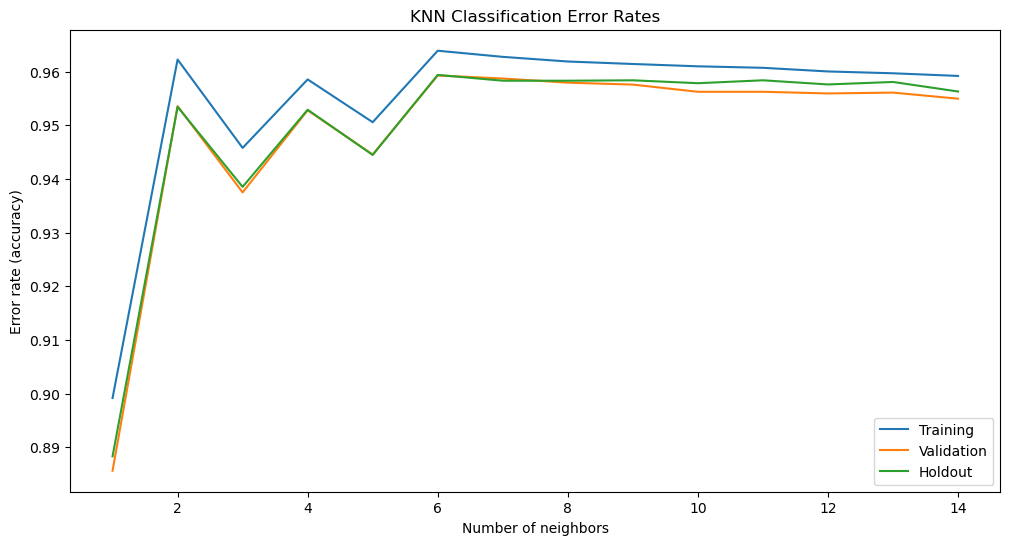


Evauation on Holdout-Data
Holdout set accuracy: 0.9562833088746427
Classification Report on Holdout-Data:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10325
           1       0.94      0.84      0.89      2622

    accuracy                           0.96     12947
   macro avg       0.95      0.91      0.93     12947
weighted avg       0.96      0.96      0.96     12947



In [47]:
# Plot n_neighbors for KNN
features = ['Trip Total', 'Shared Trip Authorized']
target = 'Tip Binary'
X = knn_data[features]
y = knn_data[target]
find_knn(X, y, max_k=15)

In [48]:
# RBf
sampled_data_RBF = usableData.sample(frac=0.002, random_state=24)
sampled_data_RBF.fillna(sampled_data.mean(), inplace=True)
RBF_data = sampled_data_RBF.copy()

In [49]:
features = ['Trip Total','Shared Trip Authorized']
target = 'Tip Binary'

X = RBF_data[features]
y = RBF_data[target]

# Train-Test-Holdout Split (50-20-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7), random_state=24)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold = scaler.transform(X_hold)

# Hyperparameter-Optimization and Training
param_grid = {
    'C': [1,2,5,10,50,100 ],
    'gamma': [100000,10000,1000,100,10,1,0.1,0.01,0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3)
grid.fit(X_train, y_train)

# Best Parameters and Model
best_model = grid.best_estimator_
print(f"Best model parameters: {grid.best_params_}")
print(f"Best cross-validation accuracy: {grid.best_score_}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END ......................C=1, gamma=100000, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=100000, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=100000, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=10000, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=10000, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=10000, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=1000, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=1000, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=1000, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=10

In [50]:
# Evaluation on Test-Data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_accuracy}")
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))

Test set accuracy: 0.9523686920700309
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3141
           1       0.92      0.82      0.87       743

    accuracy                           0.95      3884
   macro avg       0.94      0.90      0.92      3884
weighted avg       0.95      0.95      0.95      3884



In [51]:
# Evaluation on Holdout-Data
y_hold_pred = best_model.predict(X_hold)
holdout_accuracy = accuracy_score(y_hold, y_hold_pred)
print(f"Holdout set accuracy: {holdout_accuracy}")
print("Classification Report on Holdout-Data:\n", classification_report(y_hold, y_hold_pred))

Holdout set accuracy: 0.9586872586872587
Classification Report on Holdout-Data:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2064
           1       0.94      0.85      0.89       526

    accuracy                           0.96      2590
   macro avg       0.95      0.92      0.93      2590
weighted avg       0.96      0.96      0.96      2590



In [52]:
# Random Forest
sampled_data_rForrest = usableData.sample(frac=0.01, random_state=35)
sampled_data_rForrest.fillna(sampled_data.mean(), inplace=True) # will work without this line of code since their should be 0 missing values.
rForrest_data = sampled_data_rForrest.copy()
XRForrest = np.array(rForrest_data[['Shared Trip Authorized','Trip Total']])
YRForrest = rForrest_data['Tip Binary'].values
X_train, X_test, y_train, y_test = train_test_split(XRForrest, YRForrest, test_size=0.3, random_state=24)
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7), random_state=24)

In [53]:
# Hyperparameter-Optimization and Training
best_model = None
best_accuracy = 0

for n_estimators in [50, 100, 150]:
    for max_depth in [10, 20, 30, 40, 50, None]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=24)
        model.fit(X_train, y_train)
        
        y_test_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
print(f"Best model parameters: n_estimators={best_model.n_estimators}, max_depth={best_model.max_depth}")
print(f"Best cross-validation accuracy: {best_accuracy}")

Best model parameters: n_estimators=100, max_depth=30
Best cross-validation accuracy: 0.962152420185376


In [54]:
confusion_matrix(y_test,best_model.predict(X_test))

array([[15387,   142],
       [  593,  3298]], dtype=int64)

In [55]:
accuracy_score(y_test,best_model.predict(X_test))

0.962152420185376

In [56]:
# Evaluation on Holdout-Data
y_hold_pred = best_model.predict(X_hold)
holdout_accuracy = accuracy_score(y_hold, y_hold_pred)
print(f"Holdout set accuracy: {holdout_accuracy}")
print("Classification Report on Holdout-Data:\n", classification_report(y_hold, y_hold_pred))

Holdout set accuracy: 0.9624623464895342
Classification Report on Holdout-Data:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     10427
           1       0.96      0.84      0.90      2520

    accuracy                           0.96     12947
   macro avg       0.96      0.92      0.94     12947
weighted avg       0.96      0.96      0.96     12947

